# Tarea 1. Pandas

### Autor: Emilio Martínez Miranda


* Descargar el archivo GCB2022v27_MtCO2_flat.csv 
* Explorar el dataset
    * Desplegar nombres de columnas
    * Tipo de datos
    * Distribución de NaNs
* ¿De cuántos países diferentes hay datos?
* Graficar los valores Globales y los de México para 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita'
* Extraer datos de los países pertenecientes al G20 y graficar las columnas del punto anterior
    * ¿Cuáles son los 3 países que más contaminan en cada uno de los casos?
    * Considerando sólo la emisión de los países del G20, ¿con qué porcentaje contribuye México al Total y Per Capita?
* Eliminar NaNs
* Aplicar merge y groupby

Descargar el archivo GCB2022V27_MtCO2_flat.csv

In [1]:
# Librerías
import matplotlib.pyplot as plt
import pandas as pd

# Lectura del dataset
df = pd.read_csv('GCB2022v27_MtCO2_flat.csv')
df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


Explorar el dataset

    * Desplegar nombres de columnas
    * Tipo de datos
    * Distribución de NaNs

In [2]:
# Columnas
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [3]:
# Tipos de datos
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [4]:
# Distribución de NaNs
df.isna().sum(axis=0)

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

Eliminar NaNs

In [5]:
# Reemplazo de NaNs por 0
df = df.fillna(0)

# Distribución de NaNs después de la eliminación
df.isna().sum()

Country               0
ISO 3166-1 alpha-3    0
Year                  0
Total                 0
Coal                  0
Oil                   0
Gas                   0
Cement                0
Flaring               0
Other                 0
Per Capita            0
dtype: int64

In [6]:
# DataFrame con NaNs eliminados
df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,AFG,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,AFG,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,AFG,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


¿De cuántos países hay datos?

In [7]:
# count = set(df['Country'].values)
print('Número de países diferentes de los que se tienen datos: ', len(set(df['Country'].values)))

Número de países diferentes de los que se tienen datos:  232


Graficar los valores Globales y los de México para:

    * Total
    * Coal
    * Oil
    * Gas
    * Cement
    * Flaring
    * Per Capita

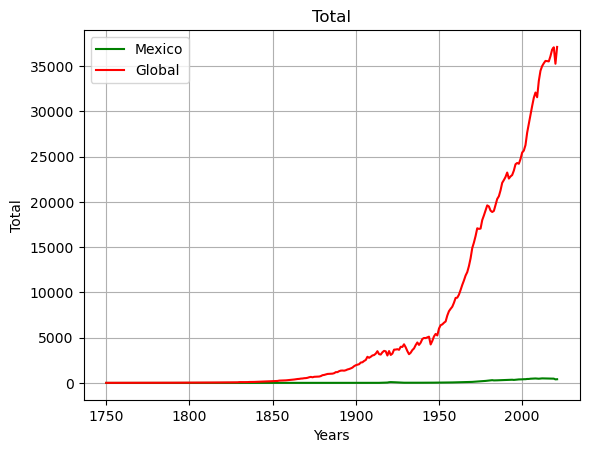

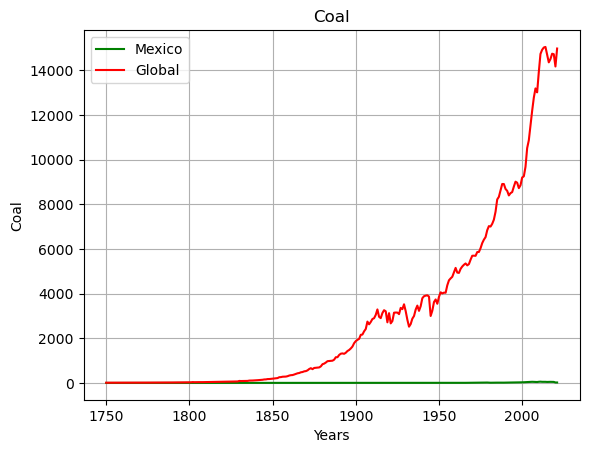

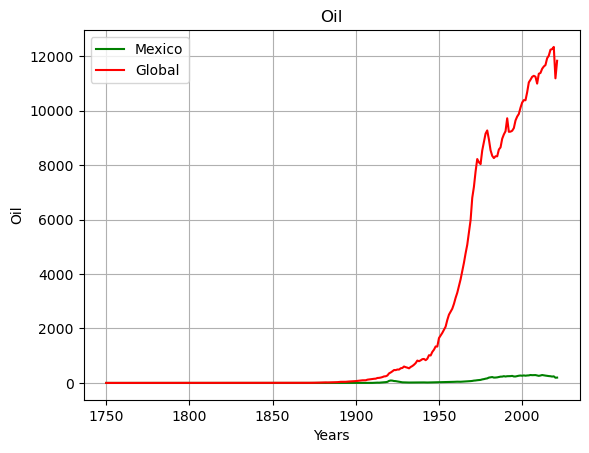

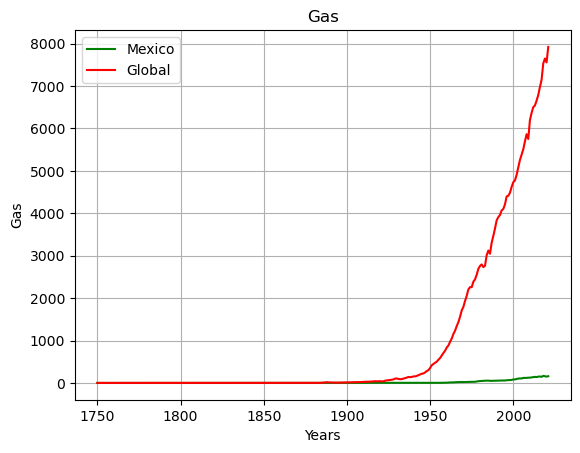

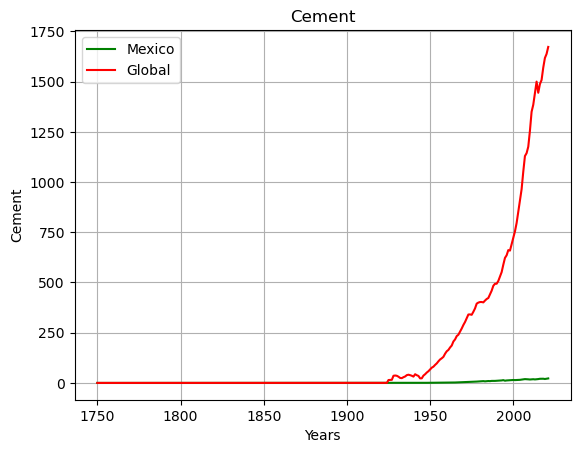

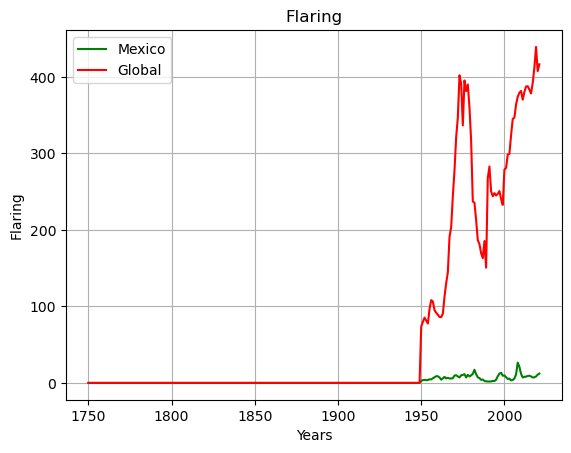

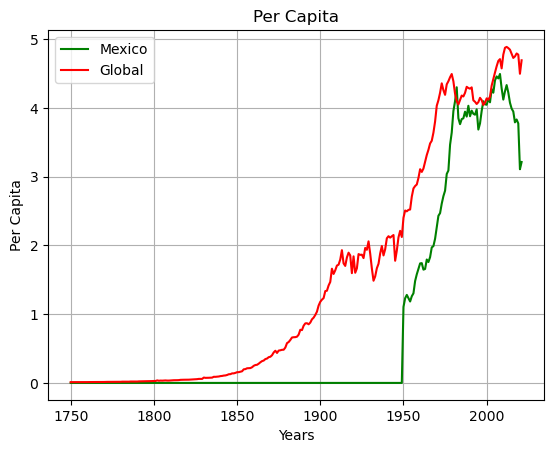

In [8]:
# Obtención de datos globales
df_global = df[df['Country'] == 'Global']
df_mex = df[df['Country'] == 'Mexico']

# Columnas de interés para el análisis
cols_to_plot = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']

# Ciclo para graficar
for i, column in enumerate(cols_to_plot):
    fig, ax = plt.subplots()
    df_mex.plot(x='Year', y=column, ax=ax, color='g', title=column, label='Mexico', xlabel='Years', ylabel=column, grid=True)
    df_global.plot(x='Year', y=column, ax=ax, color='r', title=column, label='Global', xlabel='Years', ylabel=column, grid=True)


Extraer datos de los países pertenecientes al G20 y graficar las columnas del punto anterior

    * ¿Cuáles son los 3 países que más contaminan en cada uno de los casos?
    * Considerando sólo la emisión de los países del G20, ¿con qué porcentaje contribuye México al Total y Per Capita?

In [9]:
# Lista de países del G20
g20_count = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan',
             'Mexico', 'South Korea', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom', 'United States']

# Extracción de los datos de los países del G20
df_g20 = df[df['Country'].isin(g20_count)]
df_g20 = df_g20[['Country', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']]

df_g20


,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
2176,Argentina,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2177,Argentina,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2178,Argentina,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2179,Argentina,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2180,Argentina,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
59563,United Kingdom,2017,387.367141,39.128801,174.850612,161.697365,4.409790,4.301261,5.863442
59564,United Kingdom,2018,379.729755,33.280249,173.087118,161.485261,4.363948,4.476409,5.715981
59565,United Kingdom,2019,364.753306,24.512705,168.995529,159.320842,4.448499,4.283190,5.462124
59566,United Kingdom,2020,326.263199,22.809405,143.980921,149.420095,3.899688,3.442599,4.865281


Gráficas del punto anterior para los países del G20

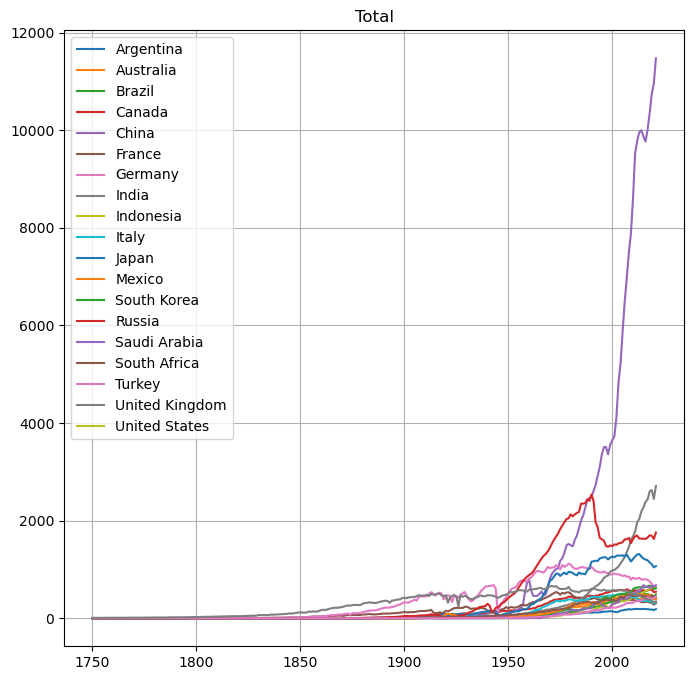

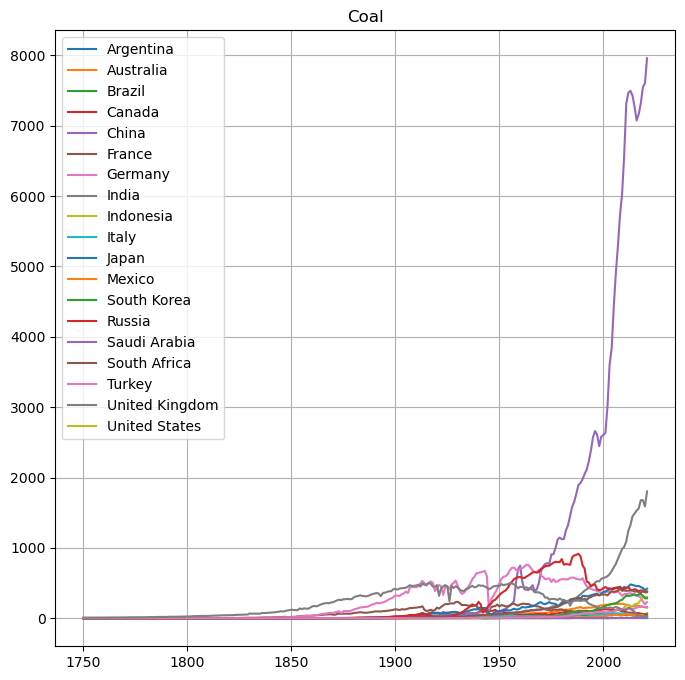

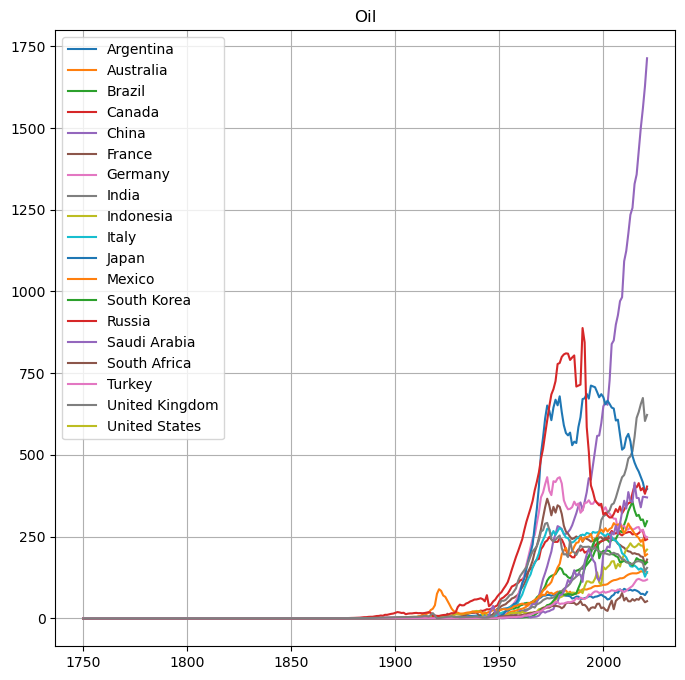

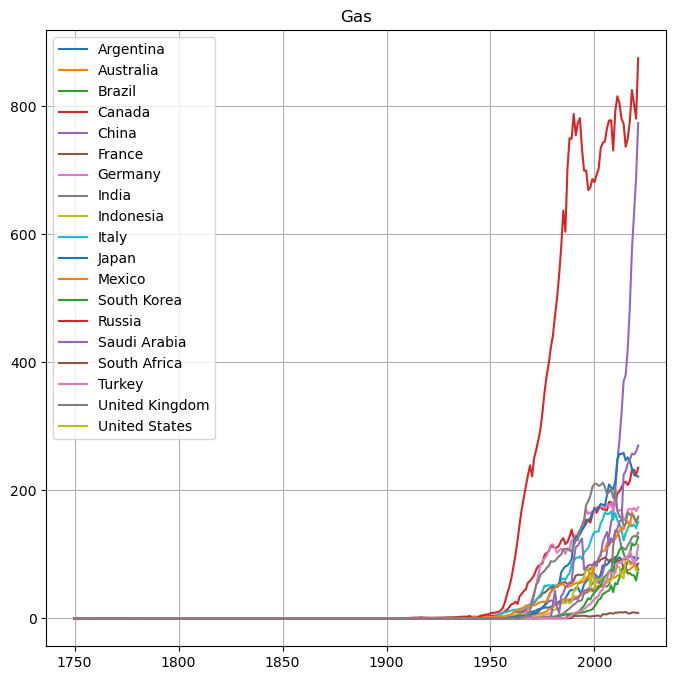

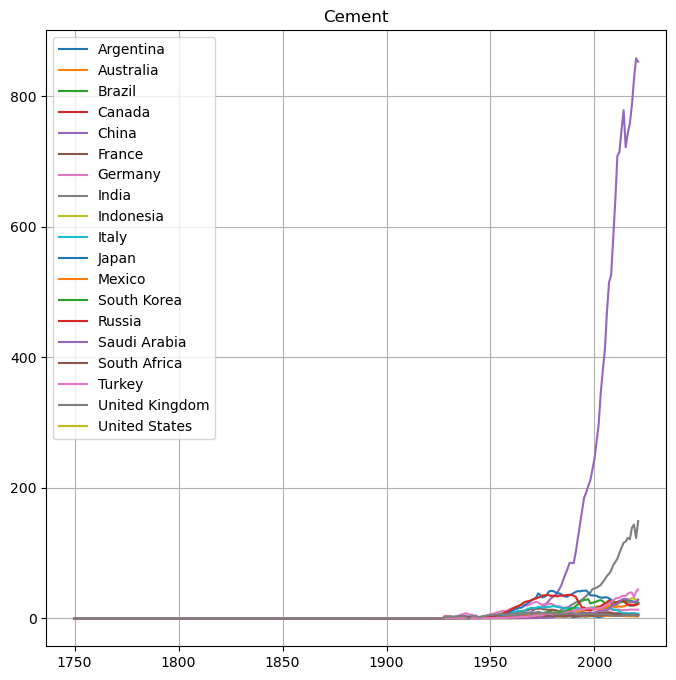

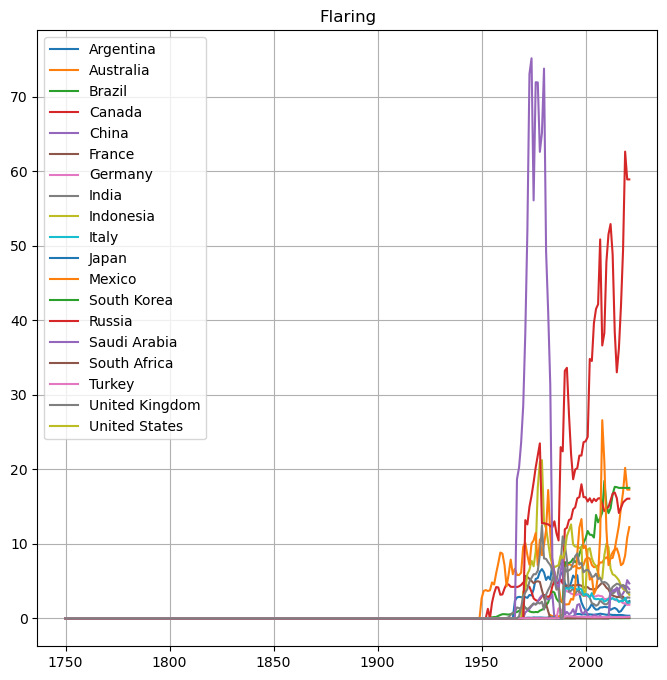

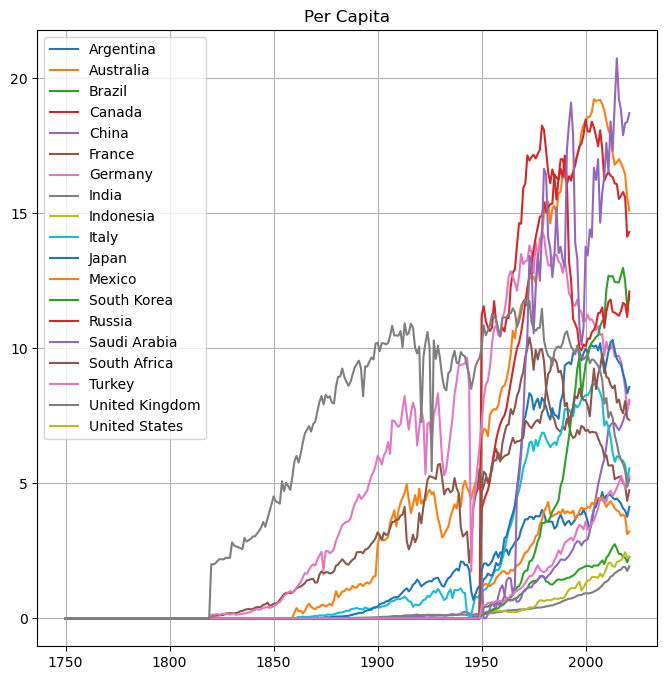

In [10]:
# Gráficas de comparación entre los países del G20 para cada caso
for column in cols_to_plot:
    plt.figure(figsize=(8,8))
    for country in g20_count:
        data_count = df_g20[df_g20['Country'] == country]
        plt.plot(data_count['Year'], data_count[column], label=country)
        plt.legend(loc='best')
        plt.title(column)
        plt.grid()
    plt.show()

Aplicar Groupby

In [11]:
# Aplicación de groupby para sumar el historial de contaminación de cada país para cada caso
df_g20 = df_g20.groupby('Country')[['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita']].sum()
df_g20

,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
Country,,,,,,,
Argentina,8636.500123,541.646679,4740.281521,2970.459488,201.576293,182.536134,250.224543
Australia,18968.830828,10343.382282,5863.383336,2154.456374,194.195586,300.027043,1251.652927
Brazil,16672.437860,2489.596331,11446.671808,1329.301665,782.058756,455.172293,103.774669
Canada,34115.395331,9714.965619,15031.196429,8278.287605,375.247137,627.008057,1106.550027
China,249352.817660,187073.411887,34491.543227,7162.011417,15657.812105,68.487541,202.362414
France,39105.764962,19078.952503,15350.881978,3663.174996,699.426246,171.551305,796.097352
Germany,93290.503809,64665.842957,19852.714039,7177.257730,1206.606673,93.573871,1311.383670
India,57105.388563,37018.082763,14798.262507,2482.896938,2624.326360,181.820000,58.111284
Indonesia,14933.863878,4039.848175,7267.839135,2515.501572,686.728754,423.946248,67.547812


In [12]:
# Los 3 países más contaminantes de cada caso
top_3 = {}

for column in cols_to_plot:
    column_data = df_g20.sort_values(by=column, ascending=False)
    top_3[column] = column_data.head(3)

    print(f'Los 3 países más contaminantes de {column} son: ')
    print(top_3[column][[column]])


Los 3 países más contaminantes de Total son: 
                 Total
Country               
China    249352.817660
Russia   117547.631435
Germany   93290.503809
Los 3 países más contaminantes de Coal son: 
                         Coal
Country                      
China           187073.411887
Germany          64665.842957
United Kingdom   56850.597464
Los 3 países más contaminantes de Oil son: 
                  Oil
Country              
China    34491.543227
Russia   33219.817986
Japan    33153.129977
Los 3 países más contaminantes de Gas son: 
                         Gas
Country                     
Russia          35054.214393
Canada           8278.287605
United Kingdom   7183.232055
Los 3 países más contaminantes de Cement son: 
               Cement
Country              
China    15657.812105
India     2624.326360
Japan     2005.370235
Los 3 países más contaminantes de Flaring son: 
                  Flaring
Country                  
Russia        1486.447360
Saudi Arabia   942

In [13]:
# ¿Con qué porcentaje contribuye México?
total_emissions = df_g20.sum()

percentages_mex = (df_g20.loc['Mexico'] / total_emissions) * 100

print('Porcentaje de contribución de México a las emisiones totales de cada caso :')
print(percentages_mex)

Porcentaje de contribución de México a las emisiones totales de cada caso :
Total         2.264749
Coal          0.304767
Oil           5.183083
Gas           4.109856
Cement        2.259239
Flaring       9.341960
Per Capita    2.112881
dtype: float64


Aplicar Merge

In [14]:
# Como no fue necesario para el análisis de datos solicitado anteriormente, se ejemplifica el uso de merge de la siguiente manera

# Tomemos los dataframes df_mex y df_global para formar un dataframe completo
df_mex_vs_global = pd.merge(df_mex, df_global, how='outer')

df_mex_vs_global

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Mexico,MEX,1750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Mexico,MEX,1751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Mexico,MEX,1752,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Mexico,MEX,1753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Mexico,MEX,1754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
539,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
540,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
541,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
542,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423
